In [1]:
pip install snowflake-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install snowflake-sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install "snowflake-connector-python[pandas]"

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [12]:
import getpass

In [13]:
%matplotlib inline
import snowflake.connector

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [23]:
conn=snowflake.connector.connect(
user='RAHUL11',
password = getpass.getpass('Your Snowflake Password:'),
##password='HOST@1857',
account='FJRYTOK-VS23514',
database='customer_segmentation',
schema= 'SEGMENT',
warehouse='COMPUTE_WH',
)

Your Snowflake Password: ········


In [24]:
cur = conn.cursor()

In [25]:
Select_CUSTOMER_TRANX_UNQ = 'SELECT * FROM CUSTOMER_TRANX_UNQ'

In [29]:
cur.execute(Select_CUSTOMER_TRANX_UNQ)
Select_CUSTOMER_TRANX_UNQ = pd.DataFrame(cur.fetch_pandas_all())
Select_CUSTOMER_TRANX_UNQ.head()

,CUSTOMER_ID,GENDER,AGE,COUNTRY,SIGNUP_DATE,TOTAL_ORDERS,TOTAL_SPENT,AVG_ORDER_VALUE,LAST_ORDER_DATE,IS_LOYAL_CUSTOMER
0,1,Female,28,US,2022-04-05,6,696,116,2022-10-23,FALSE
1,2,Male,40,Australia,2020-06-16,11,1056,96,2023-04-27,TRUE
2,3,Male,30,India,2023-02-07,10,382,38,2026-01-08,FALSE
3,4,Female,27,India,2022-06-09,1,35,35,2024-05-17,FALSE
4,5,Female,28,Australia,2021-02-03,5,467,93,2025-02-18,FALSE


In [30]:
cur.close()
conn.close()

In [32]:
Select_CUSTOMER_TRANX_UNQ.shape

(200000, 10)

In [34]:
Select_CUSTOMER_TRANX_UNQ.isnull().sum()

CUSTOMER_ID          0
GENDER               0
AGE                  0
COUNTRY              0
SIGNUP_DATE          0
TOTAL_ORDERS         0
TOTAL_SPENT          0
AVG_ORDER_VALUE      0
LAST_ORDER_DATE      0
IS_LOYAL_CUSTOMER    0
dtype: int64

In [37]:
Select_CUSTOMER_TRANX_UNQ.describe()

,CUSTOMER_ID,AGE,TOTAL_ORDERS,TOTAL_SPENT,AVG_ORDER_VALUE
count,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000
mean,100000.500000,43.48895,8.005090,720.792455,90.026780
std,57735.171256,15.00757,2.829167,388.623625,34.662743
min,1.000000,18.00000,0.000000,0.000000,0.000000
25%,50000.750000,31.00000,6.000000,417.000000,60.000000
50%,100000.500000,43.00000,8.000000,655.000000,90.000000
75%,150000.250000,56.00000,10.000000,958.000000,120.000000
max,200000.000000,69.00000,23.000000,3101.000000,150.000000


In [40]:
Select_CUSTOMER_TRANX_UNQ.dtypes

CUSTOMER_ID           int32
GENDER               object
AGE                    int8
COUNTRY              object
SIGNUP_DATE          object
TOTAL_ORDERS           int8
TOTAL_SPENT           int16
AVG_ORDER_VALUE       int16
LAST_ORDER_DATE      object
IS_LOYAL_CUSTOMER    object
dtype: object

## Python — K-Means Segmentation

In [42]:
df = Select_CUSTOMER_TRANX_UNQ

In [44]:
# Optional filtering (e.g., remove very low-order customers)
df = df[df['TOTAL_ORDERS'] > 1]

In [50]:
df.shape

(199377, 11)

In [45]:
# Select features for clustering---Filter columns for clustring
features = ['AGE', 'TOTAL_ORDERS', 'TOTAL_SPENT', 'AVG_ORDER_VALUE']
X = df[features]

In [53]:
X.head()

,AGE,TOTAL_ORDERS,TOTAL_SPENT,AVG_ORDER_VALUE
0,28,6,696,116
1,40,11,1056,96
2,30,10,382,38
4,28,5,467,93
5,65,11,773,70


In [46]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Result of This Standardization:
After applying StandardScaler():

The mean of each feature becomes 0

The standard deviation becomes 1

Data gets centered around 0 and scaled evenly


In [47]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\rehul.stark\AppData\Local\Temp\ipykernel_9292\3833180375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


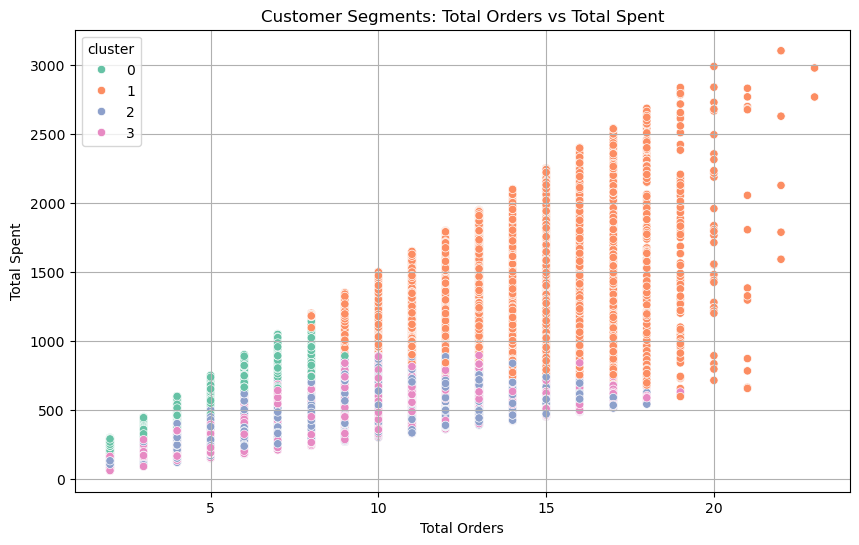

In [49]:
# Plot Total Orders vs Total Spent by Cluster
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TOTAL_ORDERS', y='TOTAL_SPENT', hue='cluster', palette='Set2')
plt.title("Customer Segments: Total Orders vs Total Spent")
plt.xlabel("Total Orders")
plt.ylabel("Total Spent")
plt.grid(True)
plt.show()


In [54]:
Select_CUSTOMER_TRANX_UNQ.dtypes

CUSTOMER_ID           int32
GENDER               object
AGE                    int8
COUNTRY              object
SIGNUP_DATE          object
TOTAL_ORDERS           int8
TOTAL_SPENT           int16
AVG_ORDER_VALUE       int16
LAST_ORDER_DATE      object
IS_LOYAL_CUSTOMER    object
dtype: object

In [57]:
# Convert 'TRUE'/'FALSE' strings to numeric values
df['IS_LOYAL_CUSTOMER'] = df['IS_LOYAL_CUSTOMER'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})

C:\Users\rehul.stark\AppData\Local\Temp\ipykernel_9292\3021792108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IS_LOYAL_CUSTOMER'] = df['IS_LOYAL_CUSTOMER'].astype(str).str.upper().map({'TRUE': 1, 'FALSE': 0})


In [58]:
# Group and summarize clusters
cluster_summary = df.groupby('cluster').agg(
    customer_count=('CUSTOMER_ID', 'count'),
    avg_orders=('TOTAL_ORDERS', 'mean'),
    avg_spent=('TOTAL_SPENT', 'mean'),
    avg_aov=('AVG_ORDER_VALUE', 'mean'),
    loyal_pct=('IS_LOYAL_CUSTOMER', lambda x: round(100 * x.sum() / len(x), 2))).reset_index()

In [59]:
cluster_summary

,cluster,customer_count,avg_orders,avg_spent,avg_aov,loyal_pct
0,0,51990,6.200692,750.720927,121.652318,0.00
1,1,45707,11.062441,1269.835780,116.419192,53.55
2,2,51012,7.543206,464.794558,62.878186,11.71
3,3,50668,7.651062,460.412746,61.224145,13.05


In [60]:
# Add % of total customers
cluster_summary['pct_of_customers'] = round((cluster_summary['customer_count'] / len(df)) * 100, 2)

In [61]:
cluster_summary

,cluster,customer_count,avg_orders,avg_spent,avg_aov,loyal_pct,pct_of_customers
0,0,51990,6.200692,750.720927,121.652318,0.00,26.08
1,1,45707,11.062441,1269.835780,116.419192,53.55,22.92
2,2,51012,7.543206,464.794558,62.878186,11.71,25.59
3,3,50668,7.651062,460.412746,61.224145,13.05,25.41
